# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

### City crime is one of the main concerns for public and decision makers.
Today's life in big cities with high population became major concern. The safety of community creates challenges for authorities and police departments. 
Crimes in big cities are different with diverse rates and might happen in any time, which in its turn need planning and resources to understand its trend and where and when it is necessary to allocate resources in certain area. 
For proper planning many questions seek for answers such as:
-	What are the major crimes in the city?
-	How the crime types distributed across the city?
-	Where are such crimes concentrated in each city's districts?
-	With limited budget, which districts should get more focus and financial support to improve its capabilities?
-	What are the main geo characterizes that repeated for a specific crime, which can be used as an indicator for a proactive approach to improve the policy service quality in other areas or cities?

Data science approach and techniques provide the means that can help in meeting such challenges and provide answers to such questions. 


## Data <a name="data"></a>

###### This project relies on different information resources..
-	Chicago crime incidents dataset from 2001 to present can be found Chicago Data Portal. , which has details information on the daily cases, such as where it happened, when, case coordinates (latitude and longitude), crime type, etc. (Sample of  data is extracted below.)

-	Foursquare, which is geo information platform that powers leading business solutions and consumer products through a deep understanding of location. Foursquare Explore API will be used to get nearby venues based on case coordinates.



In [2]:
# Import the used libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
pd.set_option('display.max_columns', 500)

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests
from bs4 import BeautifulSoup
import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

from sklearn import preprocessing

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
import folium.plugins

### Data Loading

In [ ]:
# for use in IBM Cloud
'''
import types

from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_292e33d80f68449d9f23038842d62117 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qudaJ9lycSDQq_ZQAFWUyJi-H9zlqayLbnz_8CdcUnXD',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_292e33d80f68449d9f23038842d62117.get_object(Bucket='courseracapstonetest-donotdelete-pr-4lo3xyty2salkt',Key='ChicagoCrimes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
'''


In [6]:
# For use at local Jupyter Notebook
df_data_1 = pd.read_csv('ChicagoCrimes.csv')

df_data_1.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11668274,JC240043,04/26/2019 11:58:00 PM,008XX N MAY ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1213,12.0,27.0,24.0,05,1168861.0,1905677.0,2019,05/03/2019 04:14:46 PM,41.896700,-87.655246,"(41.896700196, -87.655246179)",41.0,22620.0,25.0,109.0,46.0,49.0,15.0,60.0
1,11668131,JC240018,04/26/2019 11:58:00 PM,017XX N CENTRAL AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,GAS STATION,False,False,2531,25.0,29.0,25.0,11,1138768.0,1911350.0,2019,05/03/2019 04:14:46 PM,41.912867,-87.765636,"(41.912867052, -87.765635915)",52.0,22615.0,26.0,597.0,7.0,2.0,6.0,154.0
2,11668155,JC240031,04/26/2019 11:56:00 PM,046XX N MELVINA AVE,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,PARK PROPERTY,True,False,1622,16.0,38.0,15.0,18,1134198.0,1930660.0,2019,05/03/2019 04:14:46 PM,41.965938,-87.781969,"(41.965937596, -87.781969004)",25.0,21869.0,15.0,95.0,19.0,48.0,12.0,43.0
3,11668197,JC240026,04/26/2019 11:51:00 PM,004XX W 83RD ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,622,6.0,21.0,71.0,15,1174909.0,1849960.0,2019,05/03/2019 04:14:46 PM,41.743674,-87.634697,"(41.743674436, -87.634696986)",18.0,21554.0,40.0,1.0,13.0,59.0,20.0,236.0
4,11668158,JC239985,04/26/2019 11:49:00 PM,049XX W JACKSON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1533,15.0,28.0,25.0,08B,1143691.0,1898221.0,2019,05/03/2019 04:14:46 PM,41.876749,-87.747879,"(41.876748723, -87.747878888)",36.0,22216.0,26.0,69.0,7.0,32.0,25.0,137.0


Let's find out how many records in our dataset.

In [7]:
df_data_1.shape

(6859318, 30)

In [8]:
# Loading the Police District locations
df_ps = pd.read_csv('Police_Stations.csv')
df_ps = df_ps[df_ps.DISTRICT != 'Headquarters']
df_ps['DISTRICT'] = df_ps['DISTRICT'].astype(int)

#chnage the name from DISTRICT to Police Districts
df_ps.rename(columns={'DISTRICT':'Police Districts'}, inplace=True)
df_ps.dtypes
df_ps.head()

,Police Districts,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
1,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)"
2,3,Grand Crossing,7040 S Cottage Grove Ave,Chicago,IL,60637,http://home.chicagopolice.org/community/distri...,312-747-8201,312-747-5479,312-747-9168,1182739.183,1858317.732,41.766431,-87.605748,"(41.7664308925, -87.6057478606)"
3,4,South Chicago,2255 E 103rd St,Chicago,IL,60617,http://home.chicagopolice.org/community/distri...,312-747-7581,312-747-5276,312-747-9169,1193131.299,1837090.265,41.707933,-87.568349,"(41.7079332906, -87.5683491228)"
4,5,Calumet,727 E 111th St,Chicago,IL,60628,http://home.chicagopolice.org/community/distri...,312-747-8210,312-747-5935,312-747-9170,1183305.427,1831462.313,41.692723,-87.604506,"(41.6927233639, -87.6045058667)"


### Data Cleaning

In [11]:
## check for Police Districts with nan
kk= df_data_1[df_data_1["Police Districts"].isnull()]
kk[kk['Latitude'].notnull()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
146,11668448,JC240357,04/26/2019 08:00:00 PM,047XX S LARAMIE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,814,8.0,22.0,56.0,06,1142492.0,1872694.0,2019,05/03/2019 04:14:46 PM,41.806721,-87.752915,"(41.806721344, -87.752914702)",NaN,22268.0,NaN,605.0,NaN,NaN,NaN,NaN
1077,11666543,JC237969,04/25/2019 02:45:00 PM,005XX S AUSTIN BLVD,0810,THEFT,OVER $500,CTA STATION,False,False,1513,15.0,29.0,25.0,06,1136467.0,1897021.0,2019,05/02/2019 04:24:21 PM,41.873588,-87.774432,"(41.873587915, -87.774432275)",NaN,22216.0,NaN,67.0,NaN,NaN,NaN,NaN
1127,11667860,JC239733,04/25/2019 01:35:00 PM,017XX W HOWARD ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,2422,24.0,49.0,1.0,06,1163172.0,1950347.0,2019,05/02/2019 04:24:21 PM,42.019398,-87.674880,"(42.019398266, -87.67488021)",NaN,26609.0,NaN,489.0,NaN,NaN,NaN,NaN
1181,11666435,JC237826,04/25/2019 12:03:00 PM,056XX W 65TH ST,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,812,8.0,13.0,64.0,06,1139938.0,1860892.0,2019,05/02/2019 04:24:21 PM,41.774382,-87.762569,"(41.774381572, -87.762569484)",NaN,22268.0,NaN,NaN,NaN,NaN,NaN,NaN
1185,11667494,JC239197,04/25/2019 12:00:00 PM,120XX S ASHLAND AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,524,5.0,34.0,53.0,08A,1167843.0,1824822.0,2019,05/02/2019 04:24:21 PM,41.674846,-87.661306,"(41.674846291, -87.661306187)",NaN,4460.0,NaN,NaN,NaN,NaN,NaN,NaN
2004,11668005,JC239364,04/24/2019 07:00:00 AM,040XX W 87TH ST,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,VEHICLE NON-COMMERCIAL,False,True,834,8.0,18.0,70.0,08B,1151177.0,1846565.0,2019,05/01/2019 04:31:01 PM,41.734854,-87.721742,"(41.734853784, -87.721742013)",NaN,10412.0,NaN,NaN,NaN,NaN,NaN,NaN
2610,11664145,JC235012,04/23/2019 11:08:00 AM,017XX W HOWARD ST,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,GROCERY FOOD STORE,True,False,2422,24.0,49.0,1.0,15,1163126.0,1950347.0,2019,04/30/2019 04:05:35 PM,42.019399,-87.675049,"(42.019399237, -87.675049485)",NaN,21853.0,NaN,489.0,NaN,NaN,NaN,NaN
2953,11663484,JC234412,04/22/2019 07:00:00 PM,047XX S LARAMIE AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,False,814,8.0,22.0,56.0,08A,1142492.0,1872694.0,2019,04/29/2019 04:18:19 PM,41.806721,-87.752915,"(41.806721344, -87.752914702)",NaN,22268.0,NaN,605.0,NaN,NaN,NaN,NaN
3453,11662513,JC233290,04/22/2019 01:55:00 AM,058XX W ROOSEVELT RD,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,True,1513,15.0,29.0,25.0,14,1137728.0,1894089.0,2019,04/29/2019 04:18:19 PM,41.865519,-87.769873,"(41.865519477, -87.769873088)",NaN,4458.0,NaN,61.0,NaN,NaN,NaN,NaN
3704,11665280,JC236407,04/21/2019 06:00:00 PM,068XX N KEDZIE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,2411,24.0,50.0,2.0,06,1153849.0,1945170.0,2019,04/28/2019 04:08:06 PM,42.005384,-87.709327,"(42.005384054, -87.709326751)",42.0,22528.0,20.0,30.0,27.0,12.0,NaN,NaN


In [12]:
# Check for Case Number Duplications
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df_data_1[df_data_1.duplicated(['Case Number'])]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
            ID Case Number                    Date                   Block  \
648      24508    JC238667  04/26/2019 02:27:00 AM       052XX W QUINCY ST   
11236    24480    JC218766  04/10/2019 09:53:00 AM         034XX W OHIO ST   
16801    24463    JC208421  04/01/2019 11:55:00 PM   077XX S EGGLESTON AVE   
16894    24460    JC208229  04/01/2019 08:29:00 PM      007XX S CICERO AVE   
53917    24395    JC138307  02/03/2019 02:34:00 AM         009XX E 75TH ST   
72587    24369    JC103046  01/03/2019 02:37:00 PM     050XX S INDIANA AVE   
82535    24355    JB560410  12/19/2018 09:40:00 PM      066XX S OAKLEY AVE   
102634   24309    JB523961  11/21/2018 10:10:00 AM        066XX S LOWE AVE   
103761   24302    JB522024  11/19/2018 04:04:00 PM    025XX S MICHIGAN AVE   
103762   24303    JB522024  11/19/2018 04:04:00 PM    025XX S MICHIGAN AVE   
124027   24249    JB485287  10/22/2018 12:03:00 PM        055XX S GREEN ST  

In [13]:
# check for duplication, below is sample
df_data_1.loc[df_data_1['Case Number'] == 'G491428']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
6553917,1013,G491428,08/18/2001 01:55:00 AM,113XX S CHURCH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,2212,22.0,19.0,75.0,01A,1166147.0,1829593.0,2001,03/19/2019 04:11:22 PM,41.687975,-87.667379,"(41.687974882, -87.667378872)",33.0,22212.0,74.0,378.0,42.0,13.0,9.0,257.0
6553918,1014,G491428,08/18/2001 01:55:00 AM,113XX S CHURCH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,2212,22.0,19.0,75.0,01A,1166147.0,1829593.0,2001,03/19/2019 04:11:22 PM,41.687975,-87.667379,"(41.687974882, -87.667378872)",33.0,22212.0,74.0,378.0,42.0,13.0,9.0,257.0
6553919,1012,G491428,08/18/2001 01:55:00 AM,113XX S CHURCH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,2212,22.0,19.0,75.0,01A,1166147.0,1829593.0,2001,03/19/2019 04:11:22 PM,41.687975,-87.667379,"(41.687974882, -87.667378872)",33.0,22212.0,74.0,378.0,42.0,13.0,9.0,257.0


### Start the Data Cleaning

In [15]:
# 1- will start by removing the na values
#df_data_1.columns
df_data = df_data_1 [['ID','Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Arrest', 'Community Area', 'Year',  'Latitude', 'Longitude',
       'Zip Codes','Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts']]

#Drop rows with nan @ Latitude 	Longitude
df_data = df_data[np.isfinite(df_data['Latitude'])]

# 2-  remove the duplicated rows with the same Case Number
df_data = df_data.drop_duplicates(subset='Case Number', keep="last" )

# this a sample record was repetaed 3 times before removing the duplications
#df_data.loc[df_data['Case Number'] == 'G491428']

# 3- Year 2109 data not complete then will be droped for time being
df_data = df_data[df_data.Year != 2019]
df_data = df_data[np.isfinite(df_data['Police Districts'] )]

#change the Police Districts type to integer
df_data['Police Districts'] = df_data['Police Districts'].astype(int)

print(" No.of records after data cleaning :  " ,df_data.shape)
## Case of Police Districts 8 , which has no data since 2001
df_data[df_data['Police Districts']==8]
# before Year was 2001
# this a sample record was repetaed 3 times before removing the duplications
df_data.loc[df_data['Case Number'] == 'G122954', 'Year'] = 2018
df_data[df_data['Case Number'] == 'G122954']

 No.of records after data cleaning :   (6705122, 18)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Community Area,Year,Latitude,Longitude,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts
6784409,1406747,G122954,03/03/2001 12:30:00 AM,029XX W 111 ST,1330,CRIMINAL TRESPASS,TO LAND,True,NaN,2018,41.69176,-87.693661,4447.0,NaN,334.0,NaN,NaN,8


## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting the current load on Police Districts and classifying it based on the number of cases registered per year. Then, will analyze the major crime type happening in the most loaded district and to help in improving the arrest %, we will provide the avenues surround a crime case as the starting point for investigation. We will limit our analysis to year 2018 and area 500m around each case.

In first step we have collected the required **data: location and type (category) of every case happening in Chicago between 2001 and 2019 using Chicago Crime dataset. We have also **identified the surrounded avenues** (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of '**crimes density**' across different Police Districts of Chicago - we will use **BINNING** to identify 3 classes of Police Districts load (High, Medium, and Low) This will help in giving good idea on which areas need more budget or resources. In addition we will analyze the major load identified on one police district and try to find how can help in improving the arrest % by giving well start point for the investigation process.

During the data analyses, found more than 80,000 cases with missing districts details, so we considered KNN classifier as our preferred technique to complete such missing details with 0.999 accuracy.


## Analysis <a name="analysis"></a>

### Categorizing the Police Districts per its load (number of crimes)
Using binning to have 3 classes for the crimes' load per district (High, Medium, and Low)

In [16]:
# Binning the number of crime cases Vs. Police Districts - using 2018
p_districts_t =  df_data[['Police Districts','Year','Case Number', 'Latitude', 'Longitude']]
p_districts= p_districts_t[p_districts_t.Year == 2018].groupby('Police Districts').size().sort_values(ascending=False).reset_index(name ='Qty')
#print(p_districts_t.head())
#print(p_districts.head())
#print(p_districts.shape)
min_ = p_districts['Qty'].min()
max_ = p_districts['Qty'].max()
#print(min_)
#print(max_)
bins = np.linspace(min_, max_, 4)
group_names = ['Low', 'Medium', 'High']
group_names2 = [1,2,3]
p_districts['Qty_class'] = pd.cut(x=p_districts['Qty'], bins=bins, labels=group_names, include_lowest=True)
p_districts['Qty_class_n'] = pd.cut(x=p_districts['Qty'], bins=bins, labels=group_names2, include_lowest=True)
#limit = 1000
#df_incidents = df_data_1.iloc[0:limit, :]
p_districts.sort_values(by=['Police Districts'], inplace=True)

p_districts = p_districts.merge(df_ps, on='Police Districts')
p_districts.head()

,Police Districts,Qty,Qty_class,Qty_class_n,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1,7543,Medium,2,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
1,2,4907,Low,1,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)"
2,3,1,Low,1,Grand Crossing,7040 S Cottage Grove Ave,Chicago,IL,60637,http://home.chicagopolice.org/community/distri...,312-747-8201,312-747-5479,312-747-9168,1182739.183,1858317.732,41.766431,-87.605748,"(41.7664308925, -87.6057478606)"
3,4,51,Low,1,South Chicago,2255 E 103rd St,Chicago,IL,60617,http://home.chicagopolice.org/community/distri...,312-747-7581,312-747-5276,312-747-9169,1193131.299,1837090.265,41.707933,-87.568349,"(41.7079332906, -87.5683491228)"
4,5,12107,Medium,2,Calumet,727 E 111th St,Chicago,IL,60628,http://home.chicagopolice.org/community/distri...,312-747-8210,312-747-5935,312-747-9170,1183305.427,1831462.313,41.692723,-87.604506,"(41.6927233639, -87.6045058667)"


### Getting Chicago latitude and longitude

In [17]:
# Chicago latitude and longitude values
#Use geopy library to get the latitude and longitude values of Toronto City.
address = 'Chicago, IL, USA'
geolocator = Nominatim(user_agent="ON_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago City are 41.8755616, -87.6244212.


### Creating Chicago map and plotting the Police District with different colors as per the identified load

In [18]:
# create map and display it
Chicago_map = folium.Map(location=[latitude, longitude], zoom_start=10)

from folium.features import DivIcon
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

def color_producer(elevation):
    if elevation == 'Medium':
        return 'green'
    elif elevation == 'Low':
        return 'yellow'
    else:
        return 'red'
    
# loop through the 1000 crimes and add each to the incidents feature group
for lat, lng,el,name in zip(p_districts.LATITUDE, p_districts.LONGITUDE, p_districts.Qty_class,p_districts['Police Districts']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            clustered_marker = True,
            popup="District "+ str(name),
            fill_color=color_producer(el),
            fill_opacity=0.6
        )
        
    )
    
# creating the map legend
#legend_html ='<div style=”position: fixed;bottom: 50px; left: 50px; width: 100px; height: 90px;border:2px solid grey; z-index:9999; font-size:14px;“>&nbsp; Police Districts Status <br> &nbsp; Medium &nbsp; <i class=”fa fa-map-marker fa-2x” style=”color:green”></i><br> &nbsp; High &nbsp; <i class=”fa fa-map-marker fa-2x” style=”color:red”></i> <br> &nbsp; Low &nbsp; <i class=”fa fa-map-marker fa-2x” style=”color:yellow”></i></div>'
legend_html =   '''
                <div style="position: fixed; 
                            top: 50px; right: 50px; width: 200px; height: 130px; 
                            border:2px solid black; z-index:9999; font-size:14px;
                            ">&nbsp;<b> Police Districts Status <br><br>
                              &nbsp; High Load &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;<i class="fa fa fa-circle fa-6x" style="color:red"></i><br>
                              &nbsp; Low Load &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i class="fa fa fa-circle fa-6x" style="color:yellow"></i><br>
                              &nbsp; Medium Load &nbsp;&nbsp; <i class="fa fa-circle fa-6x" style="color:green"></i></b>
                </div>
                ''' 
Chicago_map.get_root().html.add_child(folium.Element(legend_html))        
# add incidents to map
Chicago_map.add_child(incidents)

Chicago_map.save('P_PS_load.html')
Chicago_map

### Will start analyzing the crime cases' load, the successful arrested cases trend, and the crime types  
Will start by analyzing the total number of cases per year and the arrested cases Vs un-arrested cases

In [19]:
df_year_crime = df_data[['Year', 'Case Number']].groupby(['Year']).count()

df_year_crime = df_year_crime.reset_index()
df_year_crime = df_year_crime[df_year_crime.Year >= 2013]
df_year_crime = df_year_crime.reset_index()
df_year_crime



,index,Year,Case Number
0,12,2013,305594
1,13,2014,273056
2,14,2015,257229
3,15,2016,266511
4,16,2017,264248
5,17,2018,262775


In [388]:
#df_year_crime.plot(kind='line',x='Year',y='Case Number', color='red')
#xxx.plot(kind='line',x='Year',y='Qty', color='red')
#plt.show()

In [20]:
# Arrested Vs unarrested
df_arrest = df_data[['Year','Arrest']].groupby(['Year','Arrest']).size().reset_index(name ='Qty')
df_arrest.head()
table2 = pd.pivot_table(df_arrest, values='Qty', index=['Year'],columns=['Arrest'], aggfunc=np.sum,fill_value= 0)
#print (table2)
df_arrest = pd.DataFrame(table2.to_records())
df_arrest.tail()


,Year,False,True
13,2014,194026,79030
14,2015,189994,67235
15,2016,213930,52581
16,2017,212313,51935
17,2018,210496,52279


In [21]:
# Calculating the arrested %
tt= df_arrest
tt ['Arrested %'] = (tt['True'] / (tt['True']+ tt['False']) *100).round(2)
tt.tail()

,Year,False,True,Arrested %
13,2014,194026,79030,28.94
14,2015,189994,67235,26.14
15,2016,213930,52581,19.73
16,2017,212313,51935,19.65
17,2018,210496,52279,19.89


### Plotting the Arrested vs. Non-arrested Crimes per year

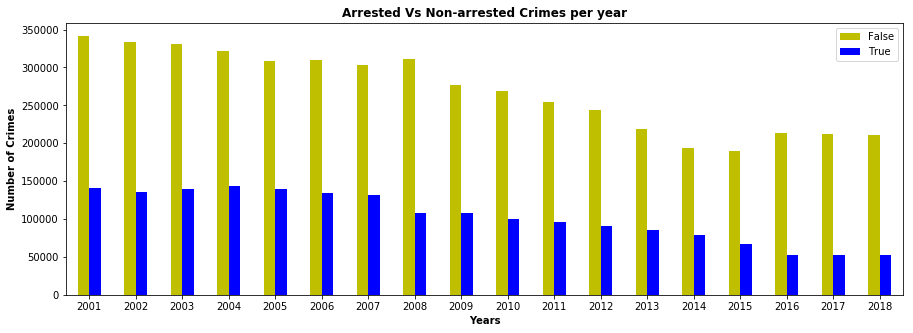

In [22]:

fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.5

#df_arrest.plot(kind='bar', x='Year', y=['Arrested %']  )

df_arrest.plot(kind='bar',  ax=ax, width=width, position=0.5 ,use_index=True, x="Year", y =['False','True'], color=["y","b"], rot=0)
#tt.plot(kind='line', marker='o', ax=ax,  y =['Arrested %'], secondary_y=True, color=["r"])

ax.set_title ('Arrested Vs Non-arrested Crimes per year',fontweight='bold')
ax.set_ylabel('Number of Crimes',fontweight='bold')
ax.set_xlabel('Years',fontweight='bold')
plt.show()
 


### Plot the Highest Crime types per year

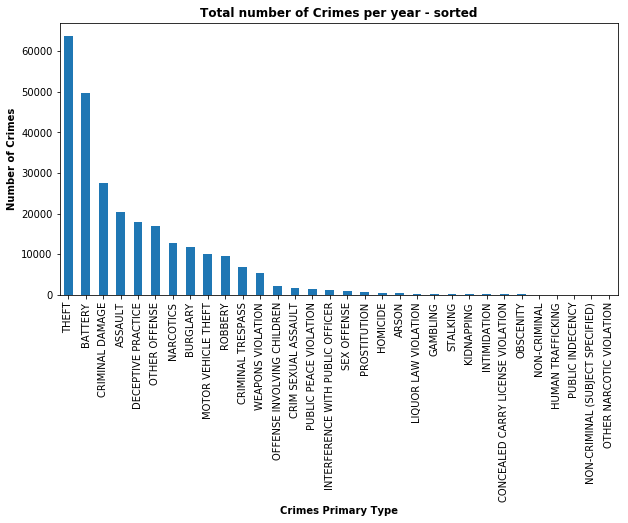

In [24]:
# Highest Crimes per year, will use 2018 as sample
df_max_crime= df_data[df_data.Year == 2018].groupby('Primary Type').size().sort_values(ascending=False)
#print (df_max_crime.head())

fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
df_max_crime.plot(kind='bar', x='Primary Type', y='Qty of Crime',title='Total number of Crimes per year - sorted', figsize=(10,5), rot=90, ax=ax )

ax.set_title ('Total number of Crimes per year - sorted',fontweight='bold')
ax.set_ylabel('Number of Crimes',fontweight='bold')
ax.set_xlabel('Crimes Primary Type',fontweight='bold')
plt.show()
 



In [25]:
# Caculating the crime types' count per year
df_year_type = df_data[['Year', 'Primary Type','Case Number']].groupby(['Year','Primary Type']).size()
#df_year_type = df_data[['Year', 'Primary Type','Case Number']]
#f_year_type = df_year_type.groupby(['Year','Primary Type']).count()
#df_year_type = df_year_type.groupby(['Year','Primary Type']).size().rename('count').reset_index()
df_year_type = df_year_type.reset_index(name='Count')
#df_year_type = df_year_type.reset_index()

#ss= df_data[df_data.Year == 2001] 
#ss= ss[['Year','Primary Type']]
#ss1= ss.drop(ss.loc[ss['Primary Type']!='ARSON'].index, inplace=True)
#ss
df_year_type.head()

,Year,Primary Type,Count
0,2001,ARSON,1004
1,2001,ASSAULT,31259
2,2001,BATTERY,93046
3,2001,BURGLARY,25943
4,2001,CRIM SEXUAL ASSAULT,1763


In [26]:
# Creating pivot table to segregate the crime types
table = pd.pivot_table(df_year_type, values='Count', index=['Year'],columns=['Primary Type'], aggfunc=np.sum,fill_value= 0)
#print (table)
df_crime = pd.DataFrame(table.to_records())   

df_crime.head()

,Year,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,2001,1004,31259,93046,25943,0,1763,55585,13179,14772,1,933,626,0,405,278,924,1613,27281,50315,0,0,0,19,2208,6,29551,6007,9,2732,8,18290,2154,202,98435,4246
1,2002,976,30643,91594,25167,0,1695,54597,13539,13166,0,947,623,0,345,330,801,1364,23215,49773,0,0,0,25,2392,5,31717,6021,8,2347,2,17687,2051,192,94896,4142
2,2003,951,29236,87691,24959,0,1525,54561,14676,13198,0,1079,557,0,407,362,700,1296,22631,53692,0,0,0,16,2886,2,30815,6157,6,2412,2,17200,1989,244,97331,4194
3,2004,774,28721,86836,24476,0,1459,52960,15818,13021,0,1119,431,0,523,346,479,981,22694,56814,0,0,0,13,2896,9,29381,7457,8,2484,1,15902,1720,214,94216,4278
4,2005,688,26920,83501,25325,0,1417,54228,16541,13095,0,1070,445,0,602,253,388,999,22338,55876,0,0,0,19,2665,9,27757,6091,4,2717,1,15935,1707,190,83904,4069


### Plotting the top 5 crime types distribution per year

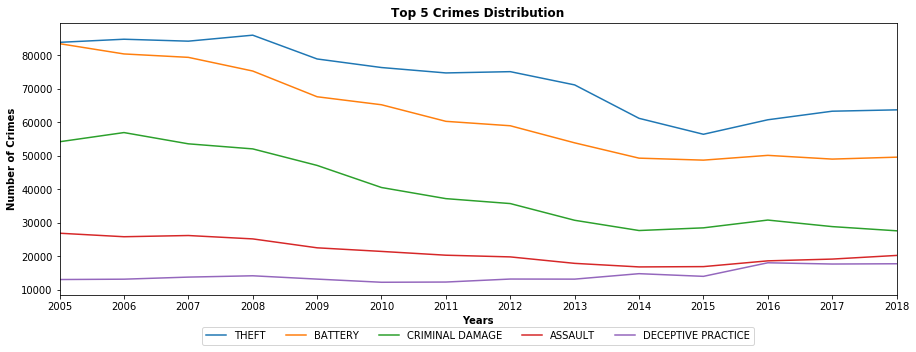

In [28]:
import matplotlib.ticker as ticker

d_plot = df_crime[df_crime.Year >= 2005]

fig = plt.figure(figsize=(15,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes

d_plot = d_plot[['Year','THEFT','BATTERY', 'CRIMINAL DAMAGE','ASSAULT','DECEPTIVE PRACTICE']]
ax = d_plot.plot(kind='line', x='Year' , use_index=True, title="Top 5 Crimes Distribution" , legend=False, ax=ax)
#ax.legend(patches, labels, loc='best')
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)
ax.set_title ('Top 5 Crimes Distribution',fontweight='bold')
ax.set_ylabel('Number of Crimes',fontweight='bold')
ax.set_xlabel('Years',fontweight='bold')
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()
 



### It is identified that Theft and Battery considered as the major crimes
This shown as keep growing during the last 4 years; for better insight we will do more data analysis against theft crimes, which can be repeated to the other types as well

In [29]:
# Extracted the Theft Crime realted records
cols= ['ID', 'Case Number', 'Primary Type', 'Date','Year','Latitude','Longitude','Police Districts']
df_c = df_data[['ID', 'Case Number', 'Primary Type','Date','Year','Latitude','Longitude','Arrest','Police Districts']]

print (df_c.shape)
df_c= df_c[df_c['Primary Type'] == 'THEFT']
print (df_c.shape)
df_c.head()

(6705122, 9)
(1405904, 9)


,ID,Case Number,Primary Type,Date,Year,Latitude,Longitude,Arrest,Police Districts
74502,11553488,JC101094,THEFT,12/31/2018 11:45:00 PM,2018,41.940519,-87.654124,False,5
74516,11555648,JC102651,THEFT,12/31/2018 11:30:00 PM,2018,41.890014,-87.631665,False,14
74526,11554125,JC101713,THEFT,12/31/2018 11:00:00 PM,2018,41.787945,-87.674130,False,17
74527,11558587,JC107094,THEFT,12/31/2018 11:00:00 PM,2018,41.926648,-87.695440,False,7
74529,11553064,JC100633,THEFT,12/31/2018 11:00:00 PM,2018,41.953347,-87.753027,False,12


In [30]:
# add the month column to be used during our analysis
df_c['Date'] = pd.to_datetime(df_c['Date'])
#df_c['Date'] = df_c['Date'] .date()
df_c['Month']= df_c['Date'].dt.month
df_c.head()

,ID,Case Number,Primary Type,Date,Year,Latitude,Longitude,Arrest,Police Districts,Month
74502,11553488,JC101094,THEFT,2018-12-31 23:45:00,2018,41.940519,-87.654124,False,5,12
74516,11555648,JC102651,THEFT,2018-12-31 23:30:00,2018,41.890014,-87.631665,False,14,12
74526,11554125,JC101713,THEFT,2018-12-31 23:00:00,2018,41.787945,-87.674130,False,17,12
74527,11558587,JC107094,THEFT,2018-12-31 23:00:00,2018,41.926648,-87.695440,False,7,12
74529,11553064,JC100633,THEFT,2018-12-31 23:00:00,2018,41.953347,-87.753027,False,12,12


In [31]:
#df_c.dtypes



In [32]:
#Generating the Qty grouped by year and month
df_c_m = df_c[['Year','Month', 'Case Number']].groupby(['Year','Month']).size().reset_index(name ='Qty')
#df_cm_p = df_cm[['Year','Arrest']].groupby(['Year','Arrest']).size().reset_index(name ='Qty')
print (df_c_m.columns)
#df_c_m  = df_c_m.reset_index()
#df_c_m = df_cm.reset_index()
df_c_m.tail()
#df_c_m.year= 2017
#df_c_m.plot(kind='line',x='Month',y='Case Number', color='red')
#xxx.plot(kind='line',x='Month',y='Qty', color='red')
#plt.show()

Index(['Year', 'Month', 'Qty'], dtype='object')


,Year,Month,Qty
211,2018,8,6380
212,2018,9,5650
213,2018,10,5540
214,2018,11,4979
215,2018,12,5416


### Plotting the Theft Crime distribution per month

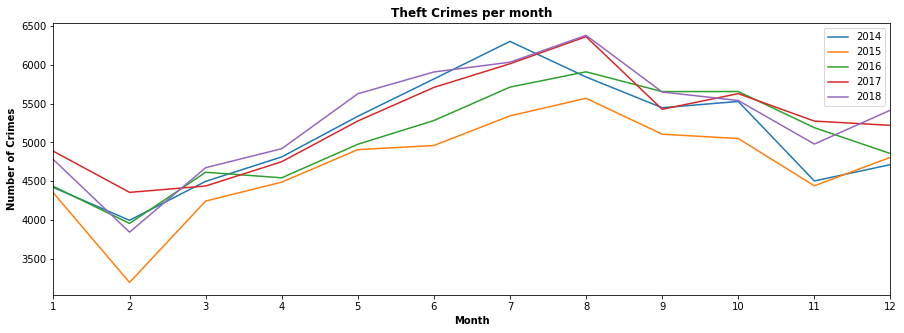

In [33]:

fig = plt.figure(figsize=(15,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

ax.set_title ('Theft Crimes per month',fontweight='bold')
ax.set_ylabel('Number of Crimes',fontweight='bold')
ax.set_xlabel('Months',fontweight='bold')
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

df_c_m_p  = df_c_m[df_c_m.Year > 2013]

# Testing the data normalization
#df_c_m_p  = df_c_m
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(df_c_m_p)
#df_c_m_p = pd.DataFrame(x_scaled)
#df_c_m_p["Qty"] = df_c_m_p["Qty"] / df_c_m_p["Qty"].max()
#print (df_c_m_p.head())
#df_c_m_p.plot(kind='line',x='Month',y='Qty', color='blue', ax=ax)

for key, grp in df_c_m_p.groupby(['Year']):
    ax = grp.plot(ax=ax, kind='line', x='Month',y='Qty',  label=key)

plt.legend(loc='best')
plt.show()

#### The Theft data analysis for the cases across different years shows that:
 - February used to has the lowest number of crimes during the year,
 - July and August used to have the maximum number of crimes
 
 Will use this notice to investigate which Police Districts have the max number of such crimes and what are the common avenues used to surround such crimes

### Total number of Theft Crimes per Police District 

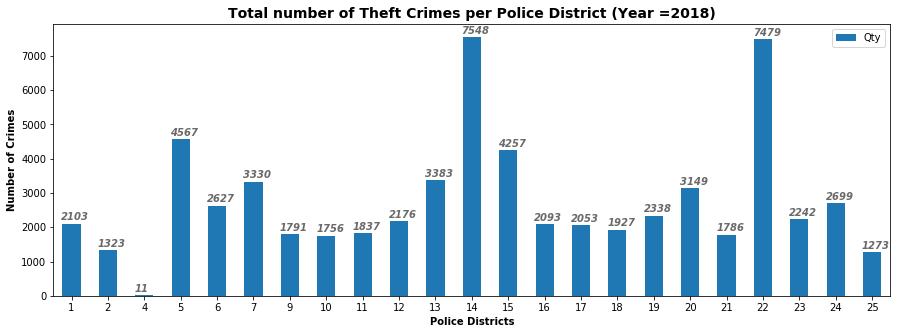

In [442]:

df_c_p = df_c[['Police Districts','Year','Month', 'Case Number']].groupby(['Year','Police Districts']).size().reset_index(name ='Qty')
df_c_p_p  = df_c_p[df_c_p.Year == 2018]
#df_c_p_p.head()
fig2 = plt.figure(figsize=(15,5)) # Create matplotlib figure
ax = fig2.add_subplot(111) # Create matplotlib axes


ax.set_ylabel('Number of Crimes',fontweight='bold')
ax.set_xlabel ('Police Districts',fontweight='bold')
ax.set_title ('Total number of Theft Crimes per Police District (Year =2018)',fontweight='bold',fontsize=14)

df_c_p_p.plot(kind='bar', x='Police Districts', y='Qty', figsize=(15,5), rot=0, ax=ax )

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+100, \
            str(round(i.get_height(), 2)), fontsize=10, style='italic',
                fontweight='bold', color='dimgrey')

plt.show()

### Total number of Theft Crimes per District (Month=Aug.)

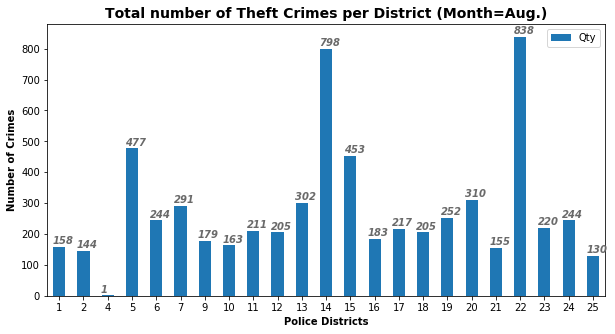

In [35]:
# for 2018  & Month 8
df_c_p_m = df_c[['Police Districts','Year','Month', 'Case Number']].groupby(['Year','Month','Police Districts']).size().reset_index(name ='Qty')
df_c_p_p_m  = df_c_p_m[(df_c_p_m.Year == 2018) & (df_c_p_m.Month == 8)]
#df_c_p_p.head()
fig2 = plt.figure(figsize=(15,5)) # Create matplotlib figure
ax = fig2.add_subplot(111) # Create matplotlib axes


ax.set_ylabel('Number of Crimes',fontweight='bold')
ax.set_xlabel ('Police Districts',fontweight='bold')
ax.set_title ('Total number of Theft Crimes per District (Month=Aug.)',fontweight='bold',fontsize=14)

df_c_p_p_m.plot(kind='bar', x='Police Districts', y='Qty', figsize=(10,5), rot=0, ax=ax )

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+10, \
            str(round(i.get_height(), 2)), fontsize=10, style='italic',
                fontweight='bold', color='dimgrey')

plt.show()

#### Districts 14 and 22 found to have the highest number of Theft crimes
Now will deal with Police District 22 and will plot its related Theft crimes locationa

In [36]:
# the arrest ratio is 8.6 %  (only 546 from 6380 on month 8)
df_p_22= df_c[(df_c.Year ==2018) & (df_c.Month == 8) & (df_c.Arrest== False) & (df_c['Police Districts']==22)] 
# use the below line incase you want the same for all districts
#df_p_22= df_c[(df_c.Year ==2018) & (df_c.Month == 8) & (df_c.Arrest== False)]
df_p_22.head()

,ID,Case Number,Primary Type,Date,Year,Latitude,Longitude,Arrest,Police Districts,Month
162346,11432238,JB417011,THEFT,2018-08-31 19:15:00,2018,41.880337,-87.629366,False,22,8
162455,11432129,JB416896,THEFT,2018-08-31 17:00:00,2018,41.883743,-87.641252,False,22,8
162559,11432012,JB416609,THEFT,2018-08-31 15:00:00,2018,41.885728,-87.625979,False,22,8
162612,11457660,JB450244,THEFT,2018-08-31 14:00:00,2018,41.866578,-87.624134,False,22,8
162615,11432053,JB416579,THEFT,2018-08-31 13:55:00,2018,41.886191,-87.624527,False,22,8


Now let's superimpose the locations of the crimes onto the map. The way to do that in Folium is to create a feature group with its own features and style.

### Define Foursquare Credentials and Version

In [37]:
#Foursquare connection
CLIENT_ID = 'S4YOO4WU5PJHWEXO22DTISQSYEUKWPR' # your Foursquare ID
CLIENT_SECRET = 'JQQZEZAEPL31BLXKHNDR3AXY30' # your Foursquare Secret
VERSION = '20190504'
LIMIT = 30
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

### Plotting the crimes registred under Police District 22

In [39]:
# create map and display it
Chicago_map = folium.Map(location=[latitude, longitude], zoom_start=13)
#Ploting the Crime locations
incidents = folium.map.FeatureGroup()

def color_producer(elevation):
    if elevation == 'Medium':
        return 'green'
    elif elevation == 'Low':
        return 'yellow'
    else:
        return 'red'
    
# loop through the 1000 crimes and add each to the incidents feature group
for lat, lng, name in zip(df_p_22.Latitude, df_p_22.Longitude, df_p_22['Case Number']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='red',
            fill=True,
            clustered_marker = True,
            popup="Case No. "+ str(name),
            #fill_color=color_producer(el),
            fill_opacity=0.6
        )
        
    )
 
for lat, lng,el,name in zip(p_districts.LATITUDE, p_districts.LONGITUDE, p_districts.Qty_class,p_districts['Police Districts']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            clustered_marker = True,
            popup="District "+ str(name),
            #fill_color=color_producer(el),
            fill_opacity=0.6
        )
        
    )
#legend_html ='<div style=”position: fixed;bottom: 50px; left: 50px; width: 100px; height: 90px;border:2px solid grey; z-index:9999; font-size:14px;“>&nbsp; Police Districts Status <br> &nbsp; Medium &nbsp; <i class=”fa fa-map-marker fa-2x” style=”color:green”></i><br> &nbsp; High &nbsp; <i class=”fa fa-map-marker fa-2x” style=”color:red”></i> <br> &nbsp; Low &nbsp; <i class=”fa fa-map-marker fa-2x” style=”color:yellow”></i></div>'
legend_html =   '''
                <div style="position: fixed; 
                            top: 50px; right: 50px; width: 200px; height: 130px; 
                            border:2px solid black; z-index:9999; font-size:14px;
                            ">&nbsp;<b> Police Districts Status <br><br>
                              &nbsp; Crime Case &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;<i class="fa fa fa-circle fa-6x" style="color:red"></i><br>
                              &nbsp; Police District &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<i class="fa fa fa-circle fa-6x" style="color:yellow"></i><br>
                              </b>
                </div>
                ''' 
Chicago_map.get_root().html.add_child(folium.Element(legend_html))        
# add incidents to map
Chicago_map.add_child(incidents)

#Chicago_map.save('P_PS_load.html')
Chicago_map


#### It is obvious that District 22 is far from its registered cases, while there are other districts that much near. This notice need to be taken out as it needs the Police Dept. comments

### Finding the venues surrounded a crime location is a good start for any investigation
Here will use case number JB410653 as a sample

In [41]:
# case number JB410653 info
df_case = df_c[(df_c.Year ==2018) & (df_c.Month == 8) & (df_c.Arrest== False) & (df_c['Case Number']=='JB410653')] 
df_case.head()

,ID,Case Number,Primary Type,Date,Year,Latitude,Longitude,Arrest,Police Districts,Month
170464,11427936,JB410653,THEFT,2018-08-21 15:00:00,2018,41.884916,-87.660754,False,15,8


#### Search for a specific venue category
Here we suggest Bar as start

In [42]:
#Search Criteria
search_query = 'Bar '
radius = 500
latitude = df_case.Latitude.values[0]
longitude = df_case.Longitude.values[0]
case_no = "Case No. " + df_case['Case Number'].values[0]
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url


'https://api.foursquare.com/v2/venues/search?client_id=S4YOO4WU5PJHWEXO2GPSK0T3P2M2X3FJWU2DTISQSYEUKWPR&client_secret=JQQZEZAEUZKNL2H0B4MCC4X0QH0OSBPL31BLXKHNDR3AXY30&ll=41.884915894,-87.660754491&v=20190504&query=Bar &radius=500&limit=30'

#### Send the GET Request and examine the results

In [43]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cdaa102db04f559d9b69e64'},
 'response': {'venues': [{'id': '5c8709173fcee8002c1b4852',
    'name': 'Fairgrounds Craft Brew Bar',
    'location': {'address': '1330 W Fulton St',
     'crossStreet': 'Ada',
     'lat': 41.886776,
     'lng': -87.660096,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.886776,
       'lng': -87.660096}],
     'distance': 214,
     'postalCode': '60607',
     'cc': 'US',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['1330 W Fulton St (Ada)',
      'Chicago, IL 60607',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557831938',
    'hasPerk': False},
   {'id': '4fa4a3c6e

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [44]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
print(dataframe.shape)
dataframe.head()

(12, 17)


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,5c8709173fcee8002c1b4852,1330 W Fulton St,US,Chicago,United States,Ada,214,"[1330 W Fulton St (Ada), Chicago, IL 60607, Un...","[{'label': 'display', 'lat': 41.886776, 'lng':...",41.886776,-87.660096,60607,IL,Fairgrounds Craft Brew Bar,v-1557831938
1,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",False,4fa4a3c6e4b0fed4813bd3c5,1431 W Lake,US,Chicago,United States,NaN,265,"[1431 W Lake, Chicago, IL 60607, United States]","[{'label': 'display', 'lat': 41.88528442382812...",41.885284,-87.663918,60607,IL,Bar Siete,v-1557831938
2,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",False,4f6d0a537b0c43d8d5fc4c59,1431 W Lake St,US,Chicago,United States,at N Ashland Ave,308,"[1431 W Lake St (at N Ashland Ave), Chicago, I...","[{'label': 'display', 'lat': 41.88520216197796...",41.885202,-87.664461,60607,IL,Bar 7,v-1557831938
3,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",False,40b28c80f964a52070ff1ee3,236 N. Halsted,US,Chicago,United States,NaN,397,"[236 N. Halsted, Chicago, IL 60661, United Sta...","[{'label': 'display', 'lat': 41.8884781, 'lng'...",41.888478,-87.661048,60661,IL,Indigo Oyster Bar,v-1557831938
4,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,55bbcf9b498eb432775cedf7,1550 W Carroll Ave,US,Chicago,United States,NaN,515,"[1550 W Carroll Ave, Chicago, IL 60607, United...","[{'label': 'display', 'lat': 41.887662, 'lng':...",41.887662,-87.665760,60607,IL,"Chicago Bar Company, LLC",v-1557831938


In [45]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

print(dataframe_filtered.shape)
dataframe_filtered.head()

(12, 15)


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Fairgrounds Craft Brew Bar,Coffee Shop,1330 W Fulton St,US,Chicago,United States,Ada,214,"[1330 W Fulton St (Ada), Chicago, IL 60607, Un...","[{'label': 'display', 'lat': 41.886776, 'lng':...",41.886776,-87.660096,60607,IL,5c8709173fcee8002c1b4852
1,Bar Siete,Nightclub,1431 W Lake,US,Chicago,United States,NaN,265,"[1431 W Lake, Chicago, IL 60607, United States]","[{'label': 'display', 'lat': 41.88528442382812...",41.885284,-87.663918,60607,IL,4fa4a3c6e4b0fed4813bd3c5
2,Bar 7,Nightclub,1431 W Lake St,US,Chicago,United States,at N Ashland Ave,308,"[1431 W Lake St (at N Ashland Ave), Chicago, I...","[{'label': 'display', 'lat': 41.88520216197796...",41.885202,-87.664461,60607,IL,4f6d0a537b0c43d8d5fc4c59
3,Indigo Oyster Bar,Seafood Restaurant,236 N. Halsted,US,Chicago,United States,NaN,397,"[236 N. Halsted, Chicago, IL 60661, United Sta...","[{'label': 'display', 'lat': 41.8884781, 'lng'...",41.888478,-87.661048,60661,IL,40b28c80f964a52070ff1ee3
4,"Chicago Bar Company, LLC",Grocery Store,1550 W Carroll Ave,US,Chicago,United States,NaN,515,"[1550 W Carroll Ave, Chicago, IL 60607, United...","[{'label': 'display', 'lat': 41.887662, 'lng':...",41.887662,-87.665760,60607,IL,55bbcf9b498eb432775cedf7


In [46]:
# Now we have 12 addresses to start the investigation
dataframe_filtered.name

0            Fairgrounds Craft Brew Bar
1                             Bar Siete
2                                 Bar 7
3                     Indigo Oyster Bar
4              Chicago Bar Company, LLC
5                           Binny's Bar
6     Jameson Bartenders Ball - Chicago
7             Bare Feet Power Yoga Loft
8                       Barrelman Feast
9                            Pure Barre
10                        Barefeet Loft
11                              WestEnd
Name: name, dtype: object

#### Visualize the Venues Locations that are nearby to Case No. JB410653
Case location marked in red, the Venues marked in blue

In [47]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup=case_no,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## During the data analysis phase, found some records with no Police Districts details
This has been considered as a problem that need to be fixed using the Data Science techniques


In [48]:
# records with no data for Police Districts
df_data_1[df_data_1["Police Districts"].isnull()].shape
# found 80,222 records with no Police Districts data
df_tofix = df_data_1[df_data_1["Police Districts"].isnull()]
df_tofix_x = df_tofix[['Latitude', 'Longitude']]
df_tofix_x.shape


(80222, 2)

<div id="classification">
    <h3>Classification using K nearest neighbor </h3>
</div>

### Feature set

In [49]:
#preparing the datframe for KNN claification

df_kkn = pd.merge(df_data,p_districts[['Police Districts','Qty_class','Qty_class_n']], on='Police Districts' )
df_kkn.columns
df_kkn=df_kkn[['ID', 'Latitude', 'Longitude', 'Police Districts']]
df_kkn.columns

Index(['ID', 'Latitude', 'Longitude', 'Police Districts'], dtype='object')

In [50]:
#df_kkn['Police Districts'].value_counts()

In [51]:
# check if having any records with no details for Police Districts
df_kkn[df_kkn["Police Districts"].isnull()]


,ID,Latitude,Longitude,Police Districts


In [52]:
df_kkn.columns

Index(['ID', 'Latitude', 'Longitude', 'Police Districts'], dtype='object')

In [53]:
X = df_kkn[['Latitude', 'Longitude']] .values  #.astype(float)
X[0:5]

array([[ 41.76318136, -87.65770948],
       [ 41.76463209, -87.62831164],
       [ 41.79153134, -87.67544998],
       [ 41.78794522, -87.67412992],
       [ 41.78701723, -87.6455056 ]])

In [54]:
y = df_kkn['Police Districts'].values
y[0:5]

array([17, 17, 17, 17, 17])

In [55]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X[0:5]

### Train Test Split  

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4500584, 2) (4500584,)
Test set: (1125146, 2) (1125146,)


In [57]:
from sklearn.neighbors import KNeighborsClassifier

###  Choosing The right value for K

In [58]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.99960716, 0.99943474, 0.99932187, 0.99911745, 0.9990108 ,
       0.99886504, 0.99872194, 0.99857974, 0.99845087])

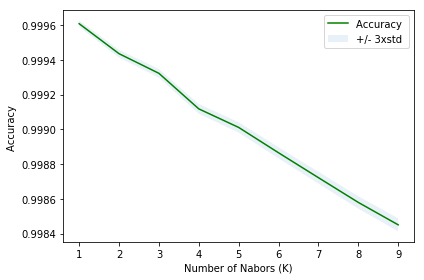

In [59]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [60]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9996071620927417 with k= 1


### Training

In [61]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Predicting

In [62]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([ 2, 20, 16, 14,  6])

### Accuracy evaluation

In [63]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9996071620927417


### Predicting the missing Police Districts

In [64]:
# remove nan
df_tofix_x = df_tofix_x[np.isfinite(df_tofix_x['Latitude'])]

yhat = neigh.predict(df_tofix_x)
yhat[0:5]

array([25, 25, 11,  9, 10])

In [65]:
yhat.shape

(15950,)

In [ ]:
#print (df_tofix_x.head())
#print (df_tofix.head())
df_tofix_x['Police Districts'] = yhat

#df_tofix = df_tofix.merge(df_tofix_x)
#print (df_tofix_x.head())
df_1 = df_tofix
df_2 =df_tofix_x
df1 = df_1
df2 = df_2
#print(df1.columns)
#print(df2.columns)
cols = ['Latitude','Longitude']
df1.loc[: , ['Police Districts']] = df2[['Police Districts']]
df1.shape




## Results and Discussion <a name="results"></a>

Our analysis shows that there is big contradiction when comparing the number of arrested cases against the un-arrested cases, which need more attention. The load classifications provided during our research shows which districts need more attention, which might result in better budget allocation or better resources allocation.

After directing our attention to Crime cases type mainly Theft, our analysis shows that on yearly based; the minimum month with reported cases is February, while July and August show with the highest reported crime cases. Further analysis confirmed that Theft and Battery are the highest crimes and district 14 and 22 carrying the major load.

Considering the minimum level of arrested cases (about 8% for Theft), it became apparent that the investigation process might need some help to achieve better progress. During this project the surrounded avenues (Bars) surrounding each reported case have been provided as good start for the investigation. 

Other issue raised during our project is the data completeness, as more than 80,000 records have been found without related police districts details. To overcome such issue, KNN classifier model has been produced that depend on the Crime case reported location and the other reported cases to complete these missing details. The developed model achieved 0.999 accuracy level.
 


## Conclusion <a name="conclusion"></a>

Purpose of this project was to help the government authorities and police departments in improving the planning and the quality of the provided service. Some primary objective was to understand the crimes and the police load trend and where and when it is necessary to allocate resources in certain area. The project come to provide proper answers to some challenging questions such as:
-	What are the major crimes in the city?
-	How the crime types distributed across the city?
-	Where are such crimes concentrated in each city's districts?
-	With limited budget, which districts should get more focus and financial support to improve the police services quality?
-	What are the main geo characterizes for a specific crime, which can be used to improve the policy service quality? 

The project succeed to cover these main concerns and provide the required details that can help the decision makers in having good insight into what is going and the areas that need improvements.
Final decision on optimal actions will be made by the stakeholders based on specific characteristics and locations, taking into consideration additional factors like budget constraints of each location, levels of load per each districts, social dynamics of every area etc.
